Afin de determiner quel anime produire pour générer un hit à succès, nous allons observer les différentes caractéristique des animés existants pour tenter de distinguer une tendance pour déterminer la structure que devrait avoir un nouvel anime pour fonctionner
Notre objectif est donc de determiner quel structure devra avoir un animé pour être massivement visionné, bien noté, et recevoir beaucoup de votes

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
import random
import io

from google.colab import files
data_to_load = files.upload()

Saving anime.csv to anime.csv


In [ ]:
df = pd.read_csv(io.BytesIO(data_to_load['anime.csv']))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14578 entries, 0 to 14577
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         14578 non-null  object 
 1   mediaType     14510 non-null  object 
 2   eps           14219 non-null  float64
 3   duration      9137 non-null   float64
 4   ongoing       14578 non-null  bool   
 5   startYr       14356 non-null  float64
 6   finishYr      14134 non-null  float64
 7   sznOfRelease  3767 non-null   object 
 8   description   8173 non-null   object 
 9   studios       14578 non-null  object 
 10  tags          14578 non-null  object 
 11  contentWarn   14578 non-null  object 
 12  watched       14356 non-null  float64
 13  watching      14578 non-null  int64  
 14  wantWatch     14578 non-null  int64  
 15  dropped       14578 non-null  int64  
 16  rating        12107 non-null  float64
 17  votes         12119 non-null  float64
dtypes: bool(1), float64(7), in

In [ ]:
df.describe(include="all")

title mediaType  ...        rating          votes
count                   14578     14510  ...  12107.000000   12119.000000
unique                  14578         8  ...           NaN            NaN
top     Chrome Shelled Regios        TV  ...           NaN            NaN
freq                        1      4510  ...           NaN            NaN
mean                      NaN       NaN  ...      2.948697    2085.787771
std                       NaN       NaN  ...      0.827642    5946.283685
min                       NaN       NaN  ...      0.844000      10.000000
25%                       NaN       NaN  ...      2.303500      34.000000
50%                       NaN       NaN  ...      2.965000     218.000000
75%                       NaN       NaN  ...      3.615500    1412.500000
max                       NaN       NaN  ...      4.702000  131067.000000

[11 rows x 18 columns]

Commencons par ne garder que le type de média qui nous interesse, les serie TV.

In [ ]:
df = df[df["mediaType"] == "TV"]
df.describe(include="all")

title mediaType  ...       rating          votes
count                    4510      4510  ...  3993.000000    3997.000000
unique                   4510         1  ...          NaN            NaN
top     Chrome Shelled Regios        TV  ...          NaN            NaN
freq                        1      4510  ...          NaN            NaN
mean                      NaN       NaN  ...     3.197587    4323.392544
std                       NaN       NaN  ...     0.769211    9012.829427
min                       NaN       NaN  ...     1.002000      10.000000
25%                       NaN       NaN  ...     2.637000     121.000000
50%                       NaN       NaN  ...     3.246000    1028.000000
75%                       NaN       NaN  ...     3.810000    4331.000000
max                       NaN       NaN  ...     4.702000  131067.000000

[11 rows x 18 columns]

Après observation de ces données nous pouvons déjà émettre certaines hypothèses grâce à l'observation de moyennes et d'écarts type:
Un animé pour avoir du succès devrait semble-t-il :
- avoir entre 1 et 144 épisodes (somme de la moyenne et de l'ecart-type pour définir la borne haute mais ici les valeurs inferieur à la moyenne mais superieur à 0 sont importantes)
- avoir été terminé plus de 15000 fois (somme de la moyenne et de l'ecart-type )
- avoir une note superieur à 3,96/5 (somme de la moyenne et de l'ecart-type)
- avoir plus de 12 000 votes (somme de la moyenne et de l'ecart-type)

Le but étant d'avoir un anime populaire, il se doit d'avoir des résultats superieurs à la moyenne haute

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


ValueError: ignored

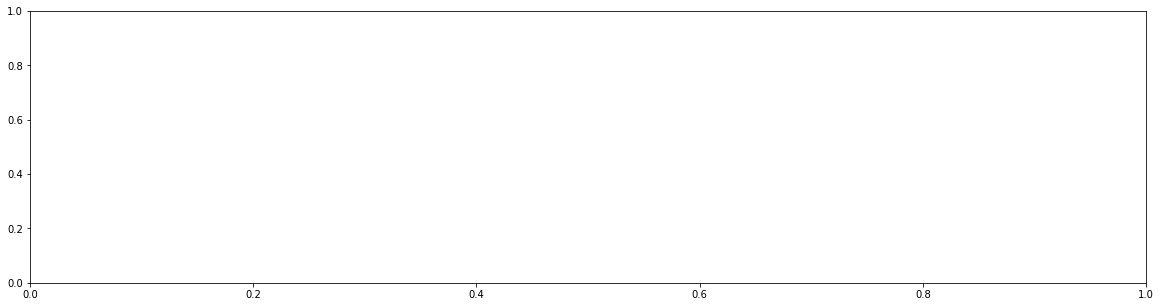

In [ ]:
corr= df[df["eps"] < 145]
corr= corr[df["watched"]>45000]
corr= corr[df["votes"]>35000]
corr= corr[df["rating"]>4.5]

f, ax = plt.subplots(figsize=(20,5))
sns.heatmap(corr, annot=True, ax =ax)
plt.savefig('heatmapEX1.png')

Commençons donc par observer si il y a des correlations entre les différentes données que nous cherchons à obtenir

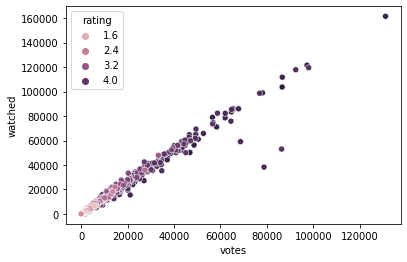

In [ ]:
sns.scatterplot(hue="rating",data=df, y="watched", x="votes")

On peut observer ici une corrélation proche de 1 entre le nombre de votes reçu par un animé, et le nombre de personne ayant visionné ce dernier. Cela permet de supposer que la quantité de votes recu par un animé dépends fortement du nombre de personne ayant visionnés l'animé.
Et l'ont peut en deduire que pour avoir un animé qui reçoit beaucoup de vote, il faut produire un anime qui génerera beaucoup de visionnage
De plus il semblerait que plus le nombre visionnage et votes sont élevé, plus les notes le sont également.

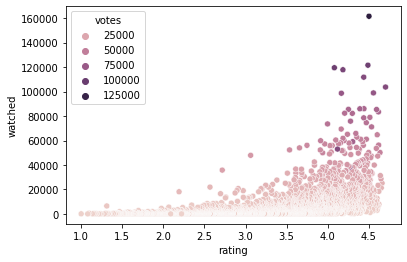

In [ ]:
sns.scatterplot(hue="votes", data=df, y="watched", x="rating")

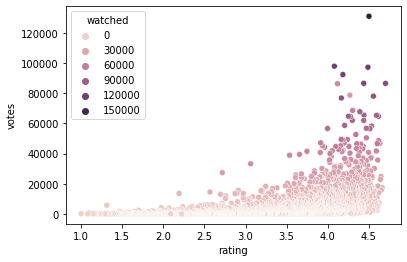

In [ ]:
sns.scatterplot(hue="watched", data=df, y="votes", x="rating")

C'est deux graphiques, en plus d'appuyer la corrélation entre le nombre de visionnage complet et les votes, permet de supposer que pour avoir un animé bien noté, il faut qu'il soit beaucoup vu et recoivent de nombreux votes.

Nous allons donc tenter de determiner sur ce qui permet d'obtenir un animé massivement visionné

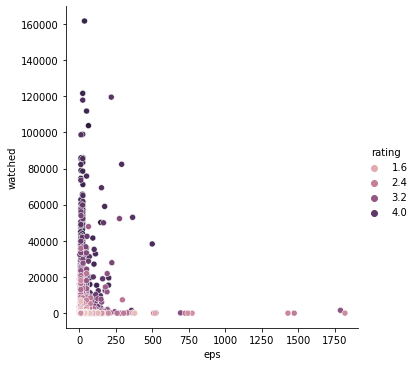

In [ ]:
sns.relplot(hue="rating", data=df, x="eps" ,y="watched")

Les animés disposant de peu d'épisodes semblent être davantage suceptible d'obtenir de nombreux visionnages et de meilleurs notes, cependant ce graphe manque de précision

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


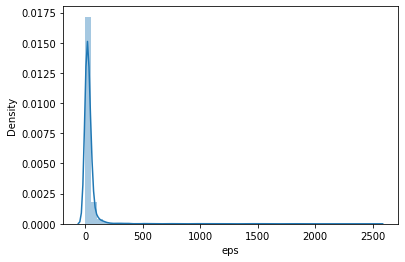

In [ ]:
sns.distplot(df.eps)

Comme l'on peut l'observer ici les animés longs se font beaucoup plus rare que les animés courts
Avec une moyenne de 37 episodes et un ecart type de 108 c'est donc davantage sur une plage de 145 épisodes que nous allons nous concentrer et estimer les valeurs supérieures comme abérrentes

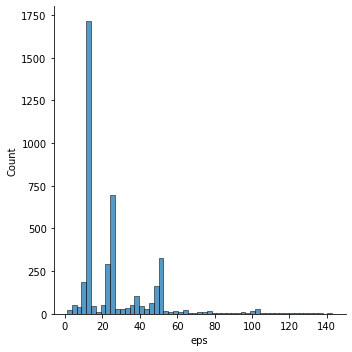

In [ ]:
df = df[df["eps"] < 145]
sns.displot(df.eps)

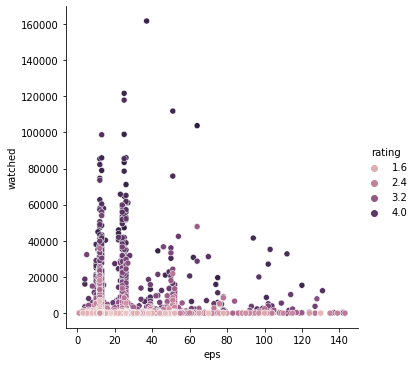

In [ ]:
sns.relplot(hue="rating", height=5, data=df, x="eps" ,y="watched")

Après observations à vu d'oeil des 2 derniers graphiques, il semblerait que les animés d'une vingtaine et une quarantaine d'épisodes aient le taux de visionnage le plus élevés par rapport à la quantité d'animé produits.

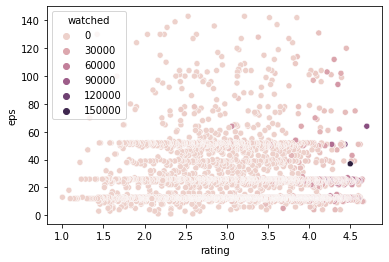

In [ ]:
sns.scatterplot(hue="watched",data=df, y="eps", x="rating")

L'observation de ce graphique nous permet de supposer qu'il n'y a pas de corrélation directe entre le nombre d'épisode et la note donnée à l'animé

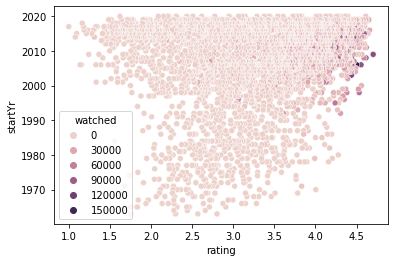

In [ ]:
sns.scatterplot(hue="watched",data=df, y= "startYr", x="rating")

L'observation de ce graphique semble indiquer que d'années en années les notes données au animé sont deviennent de  de plus en plus hétérogène,de plus on constate une quantité croissante d'animé produit dans le on peut donc en deduire que c'est la croissance de l'echantillon qui à conduit à l'héterogeneisation des resultats. On peut donc en conclure que l'année de début d'un animé n'a pas d'influence sur sa note.

Cependant l'objectif étant de produire un nouvel animé l'observation de ce graphique, montre qu'il est tout a fait possible de générer un anime bien noté à l'heure actuelle

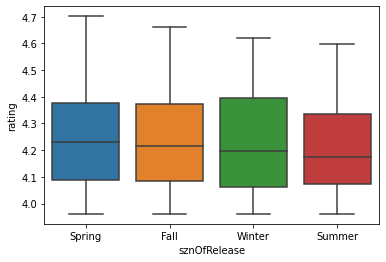

In [ ]:
sns.boxplot(data=df[df["rating"]>3.96], y= "rating", x="sznOfRelease")

D'après ce graphique, basé sur les notes superieure à 3.96 les animés sortis durant le printemps semble avoir une moyenne de note superieure au autre saisons.

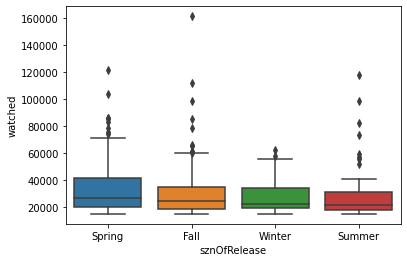

In [ ]:
sns.boxplot(data=df[df["watched"]>15000], y="watched", x="sznOfRelease")

Comme indiqué précédément ce sont les animés ayant été vu plus de 15000 fois qui nous interesse, ici on peut observer que les plus visionné sortent durant le printemps

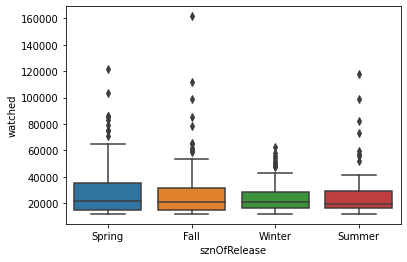

In [ ]:
sns.boxplot(data=df[df["watched"]>12000], y="watched", x="sznOfRelease")

Comme indiqué précédément ce sont les animés ayant reçu plus de 12000 votes qui nous interesse, ici on peut observer que les plus voté sortent durant le printemps

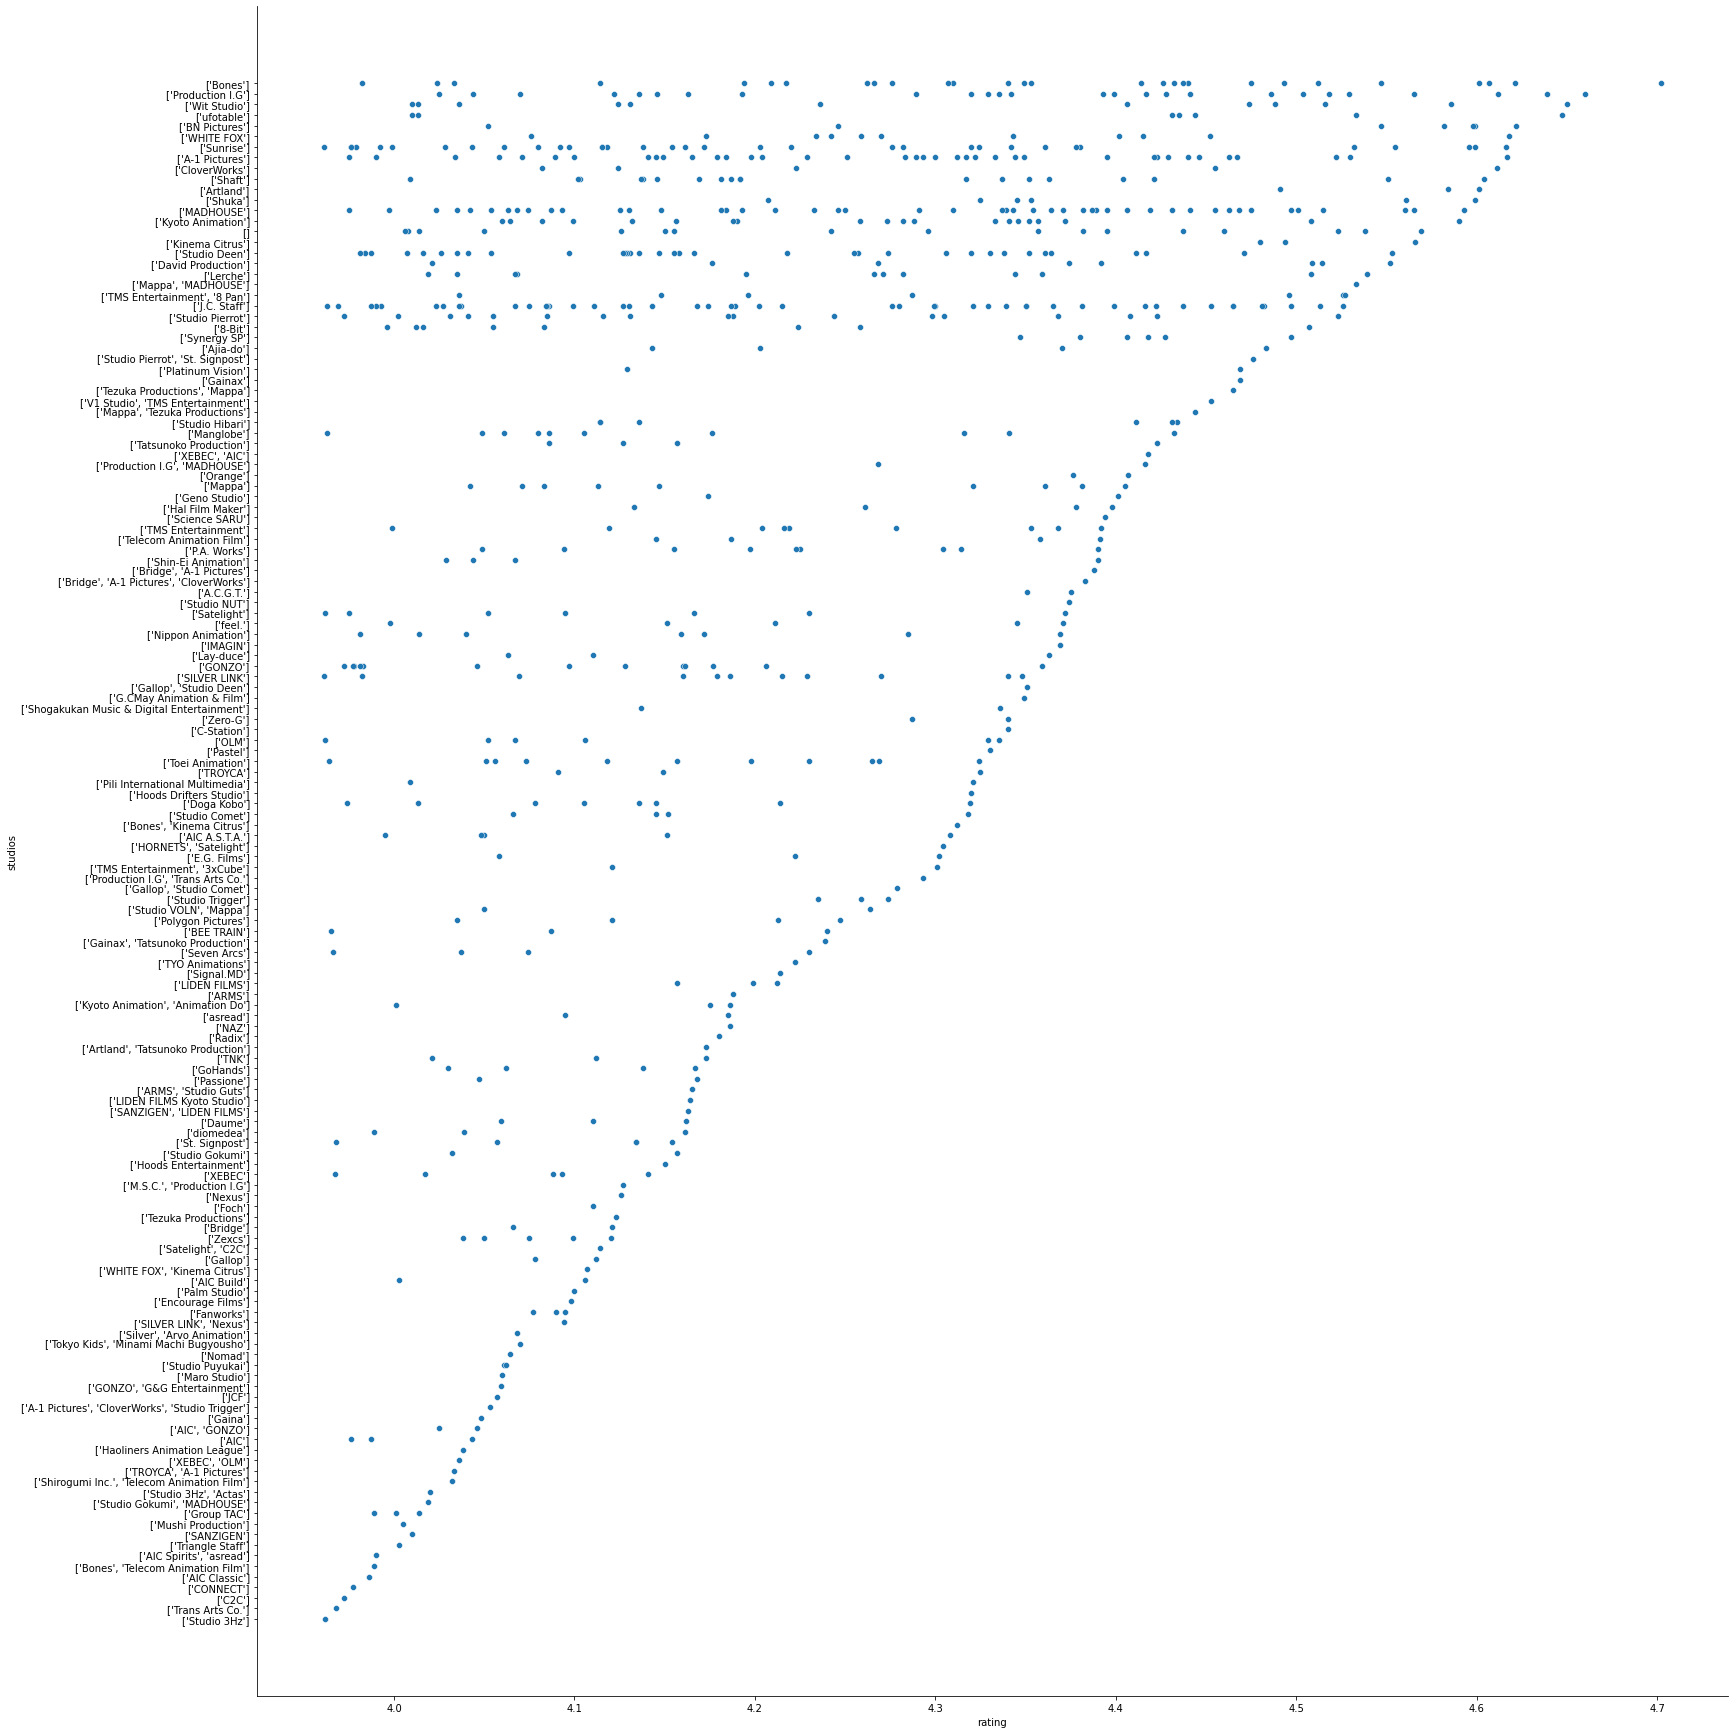

In [ ]:
sns.relplot( height=24, data=df[df["rating"]>3.96], y="studios", x="rating")

Ce graphique est illisible, cependant une droite se dessine et montre une forte corrélation entre les studios et les animés populaire, il semblerait que les chances de produire un anime bien noté pour un studio qui à déjà produit un anime ayant une excellente note soit corrélé

Par soucis de lisibililié, par lecture du graphique et parce que l'bejctif est de produire un hit à succes, les studios n'ayant pas produit d'animés ayant au moins 4.5/5 seront retirés de la liste

Ce qui nous donne le graphique suivant:



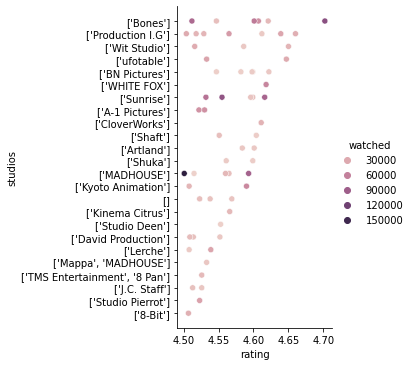

In [ ]:
sns.relplot(hue="watched", data=df[df["rating"]>4.5], y="studios", x="rating")

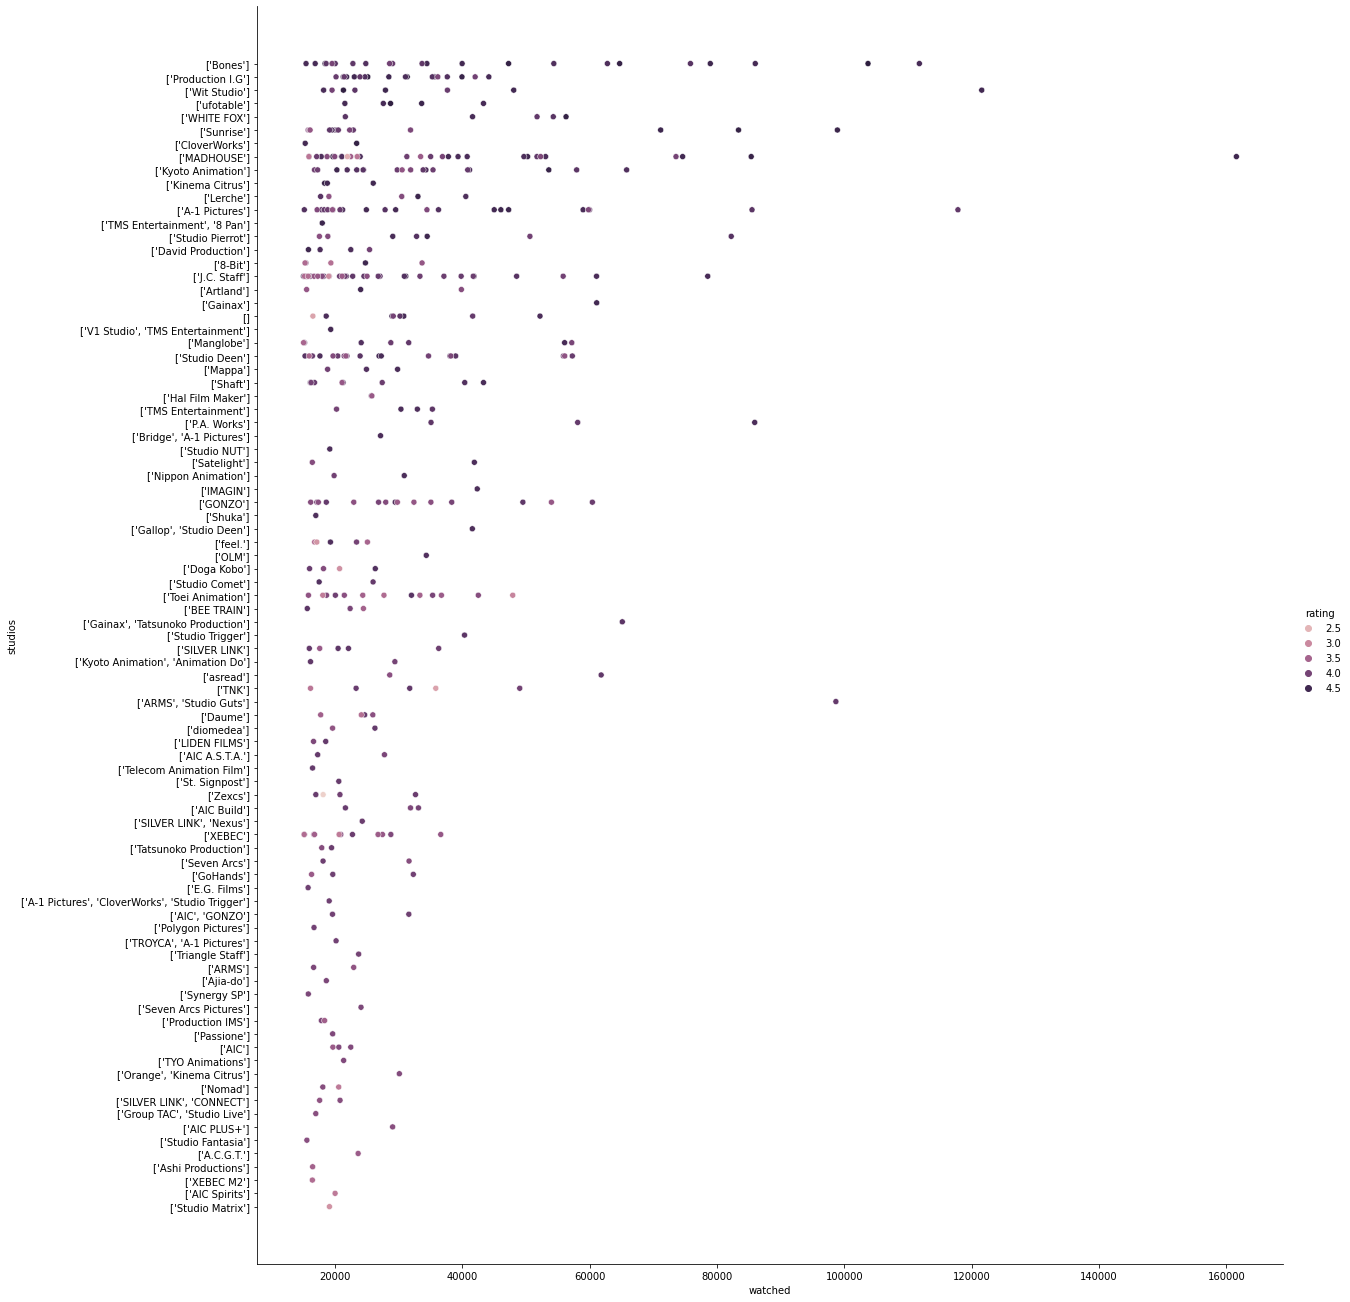

In [ ]:
sns.relplot(hue="rating", height=18, data=df[df["watched"]>15000], y="studios", x="watched")

Ce graphique est egalement illisible, cependant bien qu'une droite de corrélation ne puisse être affirmer, une augmentation de la densité d'animé ayant été visionés par plus 40000 personnes se fait ressentir on peut donc en deduire que ses studios sont capable de produire des animés massivement visionnés

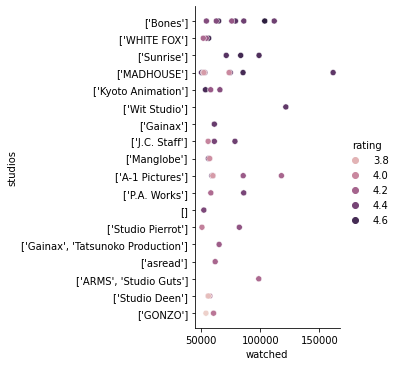

In [ ]:
sns.relplot(hue="rating", data=df[df["watched"]>50000], y="studios", x="watched")

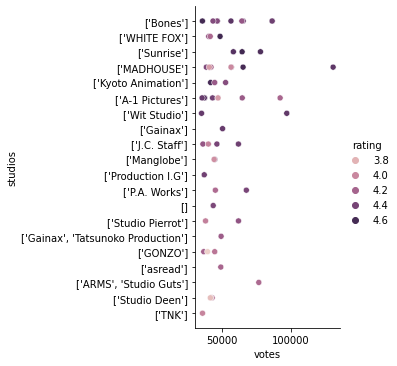

In [ ]:
sns.relplot(hue="rating", data=df[df["votes"]>35000], y="studios", x="votes")

L'etude des derniers graphiques nous permet d'etablir une liste de studios, ayant semble-t-il la faculté de produire des animés massivement visionnés, bien notés, et recevant de nombreux votes :
- Bones
- White Fox
- Sunrise
- Madhouse
- Kyoto Animation
- A-1 Pictures
- Wit Studio
- Ufotable
- JC Staff
- Studio Deen


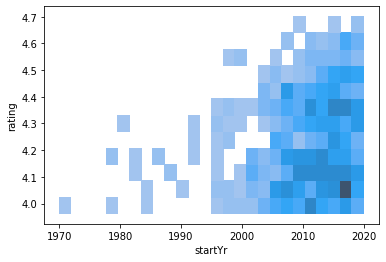

In [ ]:
sns.histplot(data=df[df["rating"]>3.96], y="rating", x="startYr")

Ce graphique nous permet de supposer que la production d'anime bien noté augmente considérablement avec le temps.

En conclusion, apres l'etude des graphiques précedents, il semblerait que pour produire un hit à succes les éléments suivant semble requis :
Il doit faire entre 12 et 25 épisodes
Et il doit être produit par l'un des studios suivants :
- Bones
- White Fox
- Sunrise
- Madhouse
- Kyoto Animation
- A-1 Pictures
- Wit Studio
- Ufotable
- JC Staff
- Studio Deen

La variable temporelle semble indiquer que la conjecture actuelle est propice à tout type de notation, cependant il semblerait qu'un début de diffusion durant le printems soit plus ouverte à l'accueil d'un succès.
Cependant il faut noter que les genres d'animés sont une variables qui peut avoir son influence, les étudier au travers des tags pourrait être une statistique ineteressante.

Partie 2

Regression logistique

Regression linéaire

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999, inplace=True)

#on utilise seulement 4 variables explicatives
X=pd.DataFrame(np.c_[df['rating'],df['eps']], columns = ['rating','eps'])
Y = df['votes']
 
#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



(2978, 2)
(1277, 2)
(2978,)
(1277,)


In [ ]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Evaluation du training set
from sklearn.metrics import r2_score
y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
 
print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base d'apprentissage
--------------------------------------
Lerreur quadratique moyenne est 7611.9171549947005
le score R2 est 0.02446759987285263


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 9253.421511526072
le score R2 est 0.006982735614985969


In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999, inplace=True)

#on utilise seulement 4 variables explicatives
X=pd.DataFrame(np.c_[df['votes'],df['eps']], columns = ['votes','eps'])
Y = df['rating']
 
#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

# Evaluation du training set
from sklearn.metrics import r2_score
y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
 
print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(rmse))
print('le score R2 est {}'.format(r2))



La performance du modèle sur la base d'apprentissage
--------------------------------------
Lerreur quadratique moyenne est 264.54453963725837
le score R2 est 0.021442905335037565


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 281.346814719079
le score R2 est 0.018103995152481733


In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999, inplace=True)

#on utilise seulement 4 variables explicatives
X=pd.DataFrame(np.c_[df['votes'],df['rating']], columns = ['votes','rating'])
Y = df['eps']
 
#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

# Evaluation du training set
from sklearn.metrics import r2_score
y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
 
print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base d'apprentissage
--------------------------------------
Lerreur quadratique moyenne est 21.222470718610122
le score R2 est 0.028230489506312795


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 20.013405896007594
le score R2 est -0.0008312267325667477


Regression logistique

62.54480477560617
[-0.00313731  1.28832824]


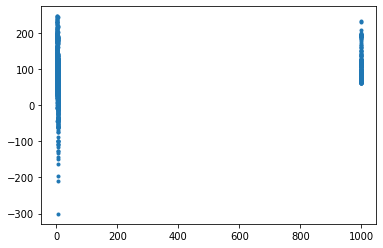

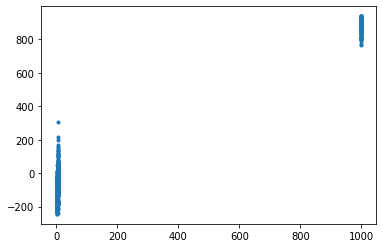

In [ ]:
from sklearn.linear_model import LinearRegression

#créer un objet reg lin
modeleReg = LinearRegression()

#créer y et X
list_var = pd.DataFrame(np.c_[df['votes'],df['eps']], columns = ['votes','eps'])
y=df.rating
X=list_var

X.fillna(0, inplace=True)

modeleReg.fit(X,y)

print(modeleReg.intercept_)
print(modeleReg.coef_)

#calcul du R²
modeleReg.score(X,y)

RMSE=np.sqrt(((y-modeleReg.predict(X))**2).sum()/len(y))

plt.plot(y, modeleReg.predict(X),'.')
plt.show()

plt.plot(y, y-modeleReg.predict(X),'.')
plt.show()


5221.32379244001
[ -2.85505994 -38.94085642]


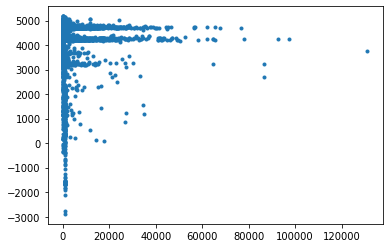

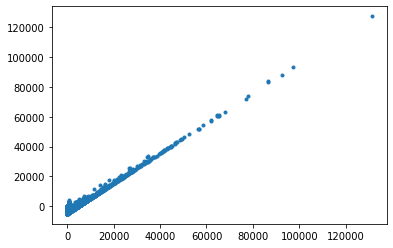

In [ ]:
from sklearn.linear_model import LinearRegression

#créer un objet reg lin
modeleReg = LinearRegression()

#créer y et X
list_var = pd.DataFrame(np.c_[df['rating'],df['eps']], columns = ['rating','eps'])
y=df.votes
X=list_var

X.fillna(0, inplace=True)

modeleReg.fit(X,y)

print(modeleReg.intercept_)
print(modeleReg.coef_)

#calcul du R²
modeleReg.score(X,y)

RMSE=np.sqrt(((y-modeleReg.predict(X))**2).sum()/len(y))

plt.plot(y, modeleReg.predict(X),'.')
plt.show()

plt.plot(y, y-modeleReg.predict(X),'.')
plt.show()

26.936757724897536
[ 0.00770494 -0.00025591]


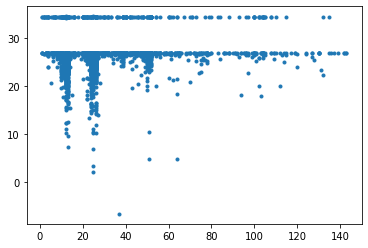

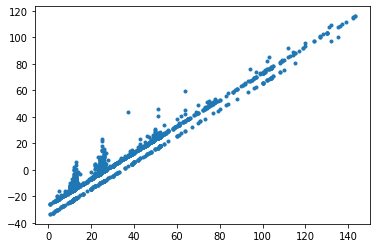

In [ ]:
from sklearn.linear_model import LinearRegression

#créer un objet reg lin
modeleReg = LinearRegression()

#créer y et X
list_var = pd.DataFrame(np.c_[df['rating'],df['votes']], columns = ['rating','votes'])
y=df.eps
X=list_var

X.fillna(0, inplace=True)

modeleReg.fit(X,y)

print(modeleReg.intercept_)
print(modeleReg.coef_)

#calcul du R²
modeleReg.score(X,y)

RMSE=np.sqrt(((y-modeleReg.predict(X))**2).sum()/len(y))

plt.plot(y, modeleReg.predict(X),'.')
plt.show()

plt.plot(y, y-modeleReg.predict(X),'.')
plt.show()